# Chapter 07 : 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기
## 1. 빠진 데이터를 찾아라! - 결측치 정제하기
### 결측치 (missing value) : 누락된 값, 비어 있는 값
#### 결측치가 있으면 함수가 적용되지 않거나 분석 결과가 왜곡되는 문제가 발생함
#### 실제 데이터를 분석할 때는 결측치가 있는지 확인해 제거하는 정제 과정을 거친 다음에 분석해야 함

### 결측치 찾기
#### 결측치 만들기 : NumPy 패키지의 np.nan 입력

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                    'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

### 결측치 확인하기 : pd.isna() 이용
#### pd.isna(데이터 프레임)
#### True : 결측치, False : 결측치 아님

In [4]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
# 데이터에 결측치가 총 몇 개 있는지 출력
pd.isna(df).sum()

sex      1
score    1
dtype: int64

### 결측치 제거하기
### dropna() 이용
#### 데이터 프레임.dropna(subset = ['변수명'])

In [6]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [8]:
# 여러 변수에 결측치 없는 데이터 추출하기
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [9]:
# 결측치가 하나라도 있으면 제거하기
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### 결측치 제거하지 않고 분석하기
#### mean(), sum()과 같은 수치 연산 함수는 결측치가 있으면 자동으로 제거하고 연산

In [10]:
df['score'].mean()

4.0

In [11]:
df['score'].sum()

16.0

In [12]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### 결측치 대체하기
### 결측치 대체법 (imputation) : 결측치를 제거하는 대신 다른 값을 채워 넣는 방법
#### 데이터가 손실되어 분석 결과가 왜곡되는 문제를 보완할 수 있음
#### 평균값이나 최빈값 같은 대표값을 구해 모든 결측치를 하나의 값으로 일괄 대체하는 방법
#### 통계 분석 기법으로 결측치의 예측값을 추정해 대체하는 방법

In [13]:
exam = pd.read_csv('exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


### fillna() 이용
#### fillna(결측치를 대체할 값)

In [15]:
# 평균값으로 결측치 대체하기
exam['math'].mean()

55.23529411764706

In [16]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [17]:
exam['math'].isna().sum()

0

## 2. 이상한 데이터를 찾아라! - 이상치 정제하기
### 이상치 (anomaly) : 정상 범위애서 크게 벗어난 값
#### 이상치가 들어 있으면 분석 결과가 왜곡되므로 분석에 앞서 이상치를 제거하는 작업을 해야 함

### 이상치 제거하기 - 존재할 수 없는 값

In [19]:
# 남자 : 1, 여자 : 2
# 점수 : 1 ~ 5점
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                    'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [20]:
# 이상치 확인하기
# value_counts() 이용
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [21]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [22]:
# 결측 처리하기
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [23]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [24]:
df.dropna(subset = ['sex', 'score'])\
  .groupby('sex')\
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [25]:
# np.where()는 문자와 NaN을 함께 반환할 수 없다.
# np.where()는 반환하는 값 중에 문자가 았으면 np.nan을 지정하더라도 결측치 NaN이 아니라 문자 'nan'을 반환한다.
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [26]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [27]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [28]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


### 이상치 제거하기 - 극단적인 값
#### 극단치 (outlier) : 논리적으로 존재할 수 있지만 극단적으로 크거나 작은 값
#### 데이터에 극단치가 있으면 분석 결과가 왜곡될 수 있으므로 분석하기 전에 제거해야 함
#### 어디까지를 정상 범위로 볼 것인지 정해야 함
#### 논리적으로 판단해 정하는 방법, 통계적인 기준을 이용하는 방법

### 상자 그림으로 극단치 기준 정하기
#### 상자 그림 (box plot) : 데이터의 분포를 직사각형의 상자 모양으로 표현한 그래프

#### 1. 상자 그림 살펴보기

<AxesSubplot:ylabel='hwy'>

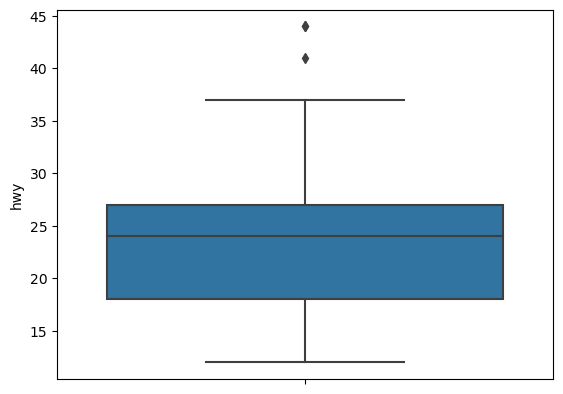

In [29]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

#### 상자 아래 세로선 = 아랫수염 : 하위 0~25% 내에 해당하는 값
#### 상자 밑면 = 1사분위수(Q1) : 하위 25% 위치하는 값
#### 상자 내 굵은 선 = 2사분위수(Q2) : 하위 50% 위치 값 (중앙값)
#### 상자 윗면 = 3사분위수(Q3) : 하위 75% 위치 값
#### 상자 위 세로선 = 윗수염 : 하위 75~100% 내에 해당하는 값
#### 상자 밖 가로선 = 극단치 경계 : Q1, Q3 밖 1.5 IQR 내 최대값
#### 상자 밖 점 표식 = 극단치 : Q1, Q3 밖 1.5 IQR을 벗어난 값

#### 2. 극단치 기준값 구하기
#### 1사분위수, 3사분위수 구하기 : quantile() 이용

In [30]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [31]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

#### IQR 구하기 : Q3 - Q1

In [32]:
iqr = pct75 - pct25
iqr

9.0

#### 하한, 상한 구하기
#### 하한 : 1사분위수보다 IQR의 1.5배만큼 더 작은 값
#### 상한 : 3사분위수보다 IQR의 1.5배만큼 더 큰 값

In [33]:
pct25 - 1.5 * iqr

4.5

In [34]:
pct75 + 1.5 * iqr

40.5

#### 3. 극단치를 결측 처리하기

In [35]:
# 4.5 - 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where( (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인하기
mpg['hwy'].isna().sum()

3

#### 4. 결측치 제거하고 분석하기

In [36]:
mpg.dropna(subset = ['hwy'])\
   .groupby('drv')\
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## Chapter 07 정리

In [40]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# NaN 할당하기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

### Q1 drv(구동 방식)별로 hwy(고속도로 연비) 평균이 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에 결측치가 있는지 확인해야 합니다. drv 변수와 hwy 변수에 결측치가 몇 개 있는지 알아보세요.

In [41]:
mpg['drv'].isna().sum()

0

In [42]:
mpg['hwy'].isna().sum()

5

### Q2 df.dropna()를 이용해 hwy 변수의 결측치를 제거하고, 어떤 구동 방식의 hwy 평균이 높은지 알아보세요. 하나의 pandas 구문으로 만들어야 합니다.

In [44]:
mpg.dropna(subset = ['hwy'])\
  .groupby('drv')\
  .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


#### f 구동 방식의 hwy 평균이 가장 높다.

In [38]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

#### 구동 방식별로 도시 연비가 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에 이상치가 있는지 확인하려고 합니다.

### Q3 drv에 이상치가 있는지 확인하세요. 이상치를 결측 처리한 다음 이상치가 사라졌는지 확인하세요. 결측 처리를 할 때는 df.isin()을 활용하세요.

In [46]:
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)
mpg['drv'].isna().sum()

0

### Q4 상자 그림을 이용해 cty에 이상치가 있는지 확인하세요. 상자 그림 기준으로 정상 범위를 벗어난 값을 결측 처리한 다음 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하세요.

<AxesSubplot:ylabel='cty'>

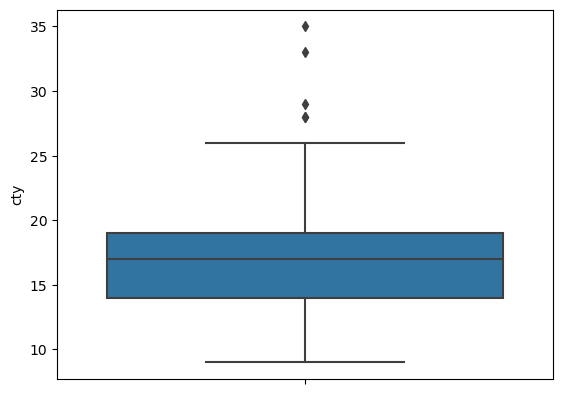

In [47]:
sns.boxplot(data = mpg, y = 'cty')

<AxesSubplot:ylabel='cty'>

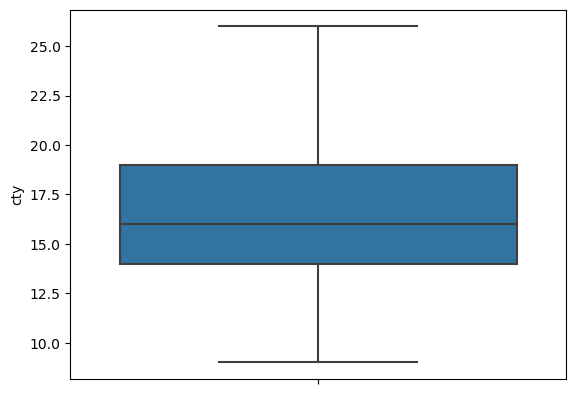

In [49]:
Q1 = mpg['cty'].quantile(.25)
Q3 = mpg['cty'].quantile(.75)
IQR = Q3 - Q1

mpg['cty'] = np.where((mpg['cty'] < Q1 - 1.5 * IQR) | (mpg['cty'] > Q3 + 1.5 * IQR), np.nan, mpg['cty'])

sns.boxplot(data = mpg, y = 'cty')

### Q5 두 변수의 이상치를 결측 처리했으나 이제 분석할 차례입니다. 이상치를 제거한 다음 drv별로 cty 평균이 어떻게 다른지 알아보세요. 하나의 pandas 구문으로 만들어야 합니다.

In [52]:
mpg.dropna(subset = ['cty'])\
  .groupby('drv')\
  .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.330097
f,19.445545
r,14.080000


#### f 구동 방식의 cty 평균이 가장 높다.
#### 다음으로 4 구동 방식과 r 구동 방식의 cty 평균이 높다.